<a href="https://colab.research.google.com/github/AshvinVignesh/Sentiment-Analysis/blob/master/model/SA_SINHALA_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install emoji==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 KB 5.2 MB/s eta 0:00:00


In [2]:
!pip install sinling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.3 MB/s eta 0:00:00


In [3]:
!pip install advertools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.1/310.1 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.9/272.9 KB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 KB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 KB 8.5 MB/s eta 0:00:00


In [4]:
!pip install translate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install pyenchant  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 6.1 MB/s eta 0:00:00


In [6]:
!pip install demoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 KB 2.4 MB/s eta 0:00:00


In [7]:
# nltk.download('wordnet')

In [107]:
from sinling import SinhalaTokenizer as tokenizer,SinhalaStemmer as stemmer, POSTagger,preprocess, word_joiner,word_splitter
# from nltk.tokenize import sent_tokenize,word_tokenize,TweetTokenizer
# from nltk.probability import FreqDist
# import advertools as adv
# from pathlib import Path
import string

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix,classification_report,ConfusionMatrixDisplay

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn import linear_model

import codecs
import nltk
nltk.download('punkt')
import re

from nltk.corpus import stopwords
from collections import Counter

from nltk.tokenize.treebank import TreebankWordDetokenizer as Detok
from nltk.tokenize.treebank import TreebankWordDetokenizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
tweet = pd.read_csv('/content/NewDatasets.txt')

In [10]:
tweet.head(10)

,Text,Class
0,"""RT @IndrajithLk: ""ඝරසරප"" චිත්‍රපටය, පහළ තියෙන...",Neutral
1,"""@NightWingzzz @lishwebber @Nimezzz මොකක් හරි ...",Neutral
2,"""@dead_mans_creed @Wind_Desika කිමද මේ තරම් කො...",Neutral
3,"""@MrThila_ @maalupaan @punchi_kella @anuwa01 @...",Neutral
4,"""විමලයා ගොනෙක් වගෙ stage එකෙ මෑරෙන්න හදනවා.......",Political
5,"""RT @SaliyaT_R: @fernandoharin ලැජ්ජයි ස⁣හෝදරය...",Racist
6,"""@fernandoharin ලැජ්ජයි ස⁣හෝදරයා මේ යන විදිහ ද...",Racist
7,"""@She_is_Nu @nthathsaranii ඇයි මං තම්බි වගේද ප...",Neutral
8,"""@Sagara_9 ඉටිම් බං උතුර ඉල්ලනසෙට් එකයි නැගෙනහ...",Racist
9,"""RT @SaliyaT_R: පේනවානේ තම්බි කවදත් ඉන්නේ උන්ට...",Racist


In [11]:
#load the crawed data
#tweet = tweet[tweet.type != 'Text']#due to mistake when scraping, some rows are written as header repeatedly by mistake
tweet = tweet.drop_duplicates() #drop duplicated rows
print('We crawed {} Tweets which contain at least one concerned emoji from 2022-04-15 to 2022-05-28:'.format(len(tweet)))
tweet

We crawed 1679 Tweets which contain at least one concerned emoji from 2022-04-15 to 2022-05-28:


,Text,Class
0,"""RT @IndrajithLk: ""ඝරසරප"" චිත්‍රපටය, පහළ තියෙන...",Neutral
1,"""@NightWingzzz @lishwebber @Nimezzz මොකක් හරි ...",Neutral
2,"""@dead_mans_creed @Wind_Desika කිමද මේ තරම් කො...",Neutral
3,"""@MrThila_ @maalupaan @punchi_kella @anuwa01 @...",Neutral
4,"""විමලයා ගොනෙක් වගෙ stage එකෙ මෑරෙන්න හදනවා.......",Political
...,...,...
1705,"""පීටීඒ සහ අයිසීසීපීආර් පනත යටතේ වැරදි ලෙස ගොනු...",Racist
1706,"""අරාබි රටවල් මුස්ලිම් නොවන සඳහා සුපිරි වෙළඳසැල...",Racist
1707,"""22 හැවිරිදි මුස්ලිම් පිරිමි ළමයෙක් ඉස්ලාම් භී...",Racist
1708,"""# ශ්‍රී ලංකාවේ මුස්ලිම් ප්‍රජාව වෙත එල්ල කරන ...",Racist


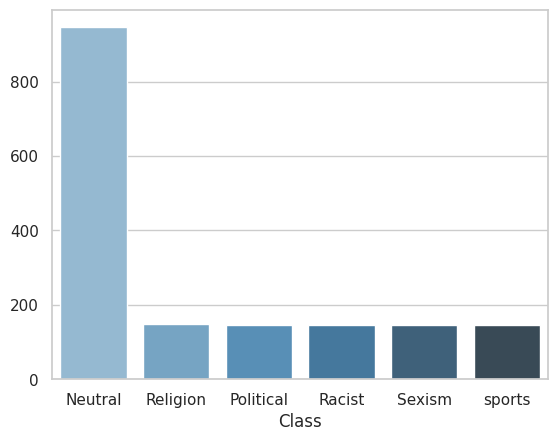

Class
Neutral      946
Religion     149
Political    146
Racist       146
Sexism       146
sports       146
dtype: int64

In [12]:
sns.set(style="whitegrid", color_codes=True)
data = tweet.groupby("Class").size().sort_values(ascending = False)
pal = sns.color_palette("Blues_d", len(data))
sns.barplot(x=data.index, y=data, palette=pal)

plt.show()
data

Text(0.5, 1.0, 'Distribution of sentiments')

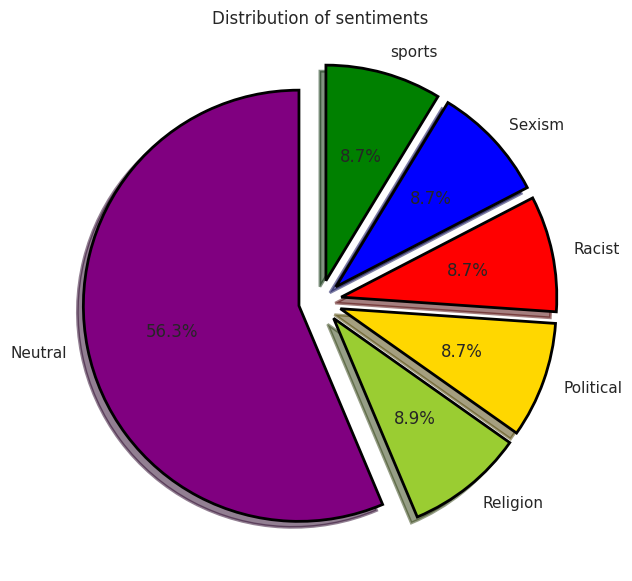

In [13]:
fig = plt.figure(figsize=(7,7))
colors = ("purple","yellowgreen", "gold", "red","blue","green")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = tweet['Class'].value_counts()
explode = (0.1,0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

**TEXT CLEANING**

In [14]:
def clean_text(text):
  '''
  DESCRIPTION:
  This function to clean text 
  INPUT: 
  text: string
  OUTPUT: 
  text: string after clean it
  ''' 
  text = re.sub("[a-zA-Z]", " ", text) # remove english letters
  text = re.sub('\n', ' ', text) # remove \n from text
  text = re.sub(r'\d+', '', text) #remove number
  text = re.sub(r'#|@\w*', ' ',text) #remove @ mentions
  text = re.sub(r'http\S+', '', text) # remove links
  text = re.sub(' +', ' ',text) # remove extra space
  text = text.strip() #remove whitespaces

  return text

In [15]:
tweet['Text'] = tweet['Text'].apply(clean_text)

In [16]:
tweet.head(10)

,Text,Class
0,""" : ""ඝරසරප"" චිත්‍රපටය, පහළ තියෙන එකෙන් කරගන්න ...",Neutral
1,""" මොකක් හරි නාට්‍යයක් තියෙන්නත් එපැයි ඉතින්""",Neutral
2,""" _ _ _ කිමද මේ තරම් කොහේදෝ ඇති විදපු ගලක් හා ...",Neutral
3,""" _ _ _ එහෙම කොහොමද උනේ 😂😂 පරය අපිව අයින් කරල ...",Neutral
4,"""විමලයා ගොනෙක් වගෙ එකෙ මෑරෙන්න හදනවා.... පරය. ...",Political
5,""" _ : ලැජ්ජයි ස⁣හෝදරයා මේ යන විදිහ දැක්කාම. ඔබ...",Racist
6,""" ලැජ්ජයි ස⁣හෝදරයා මේ යන විදිහ දැක්කාම. ඔබලාගේ...",Racist
7,""" _ _ ඇයි මං තම්බි වගේද පෙන්නෙ😏 මං බ්‍රහස්පතින...",Neutral
8,""" _ ඉටිම් බං උතුර ඉල්ලනසෙට් එකයි නැගෙනහිරපඉල්ල...",Racist
9,""" _ : පේනවානේ තම්බි කවදත් ඉන්නේ උන්ට වාසි පැත්...",Racist


In [17]:
#remove puntuations
string_text = tweet['Text'].str
tweet['Text'] = string_text.translate(str.maketrans('', '', string.punctuation))
#print(string_text)

In [18]:
tweet.head(5)

,Text,Class
0,ඝරසරප චිත්‍රපටය පහළ තියෙන එකෙන් කරගන්න,Neutral
1,මොකක් හරි නාට්‍යයක් තියෙන්නත් එපැයි ඉතින්,Neutral
2,කිමද මේ තරම් කොහේදෝ ඇති විදපු ගලක් හා උරන ...,Neutral
3,එහෙම කොහොමද උනේ 😂😂 පරය අපිව අයින් කරල නේ 😂,Neutral
4,විමලයා ගොනෙක් වගෙ එකෙ මෑරෙන්න හදනවා පරය රටට වෑ...,Political


**SPLITT CONTINUOS EMOJIS**

In [21]:
# emoji lists

joy = ['\U0001F600', '\U0001F602', '\U0001F603', '\U0001F604',
          '\U0001F606', '\U0001F607', '\U0001F609', '\U0001F60A',
          '\U0001F60B', '\U0001F60C', '\U0001F60D', '\U0001F60E',
          '\U0001F60F', '\U0001F31E', '\U0000263A', '\U0001F618',
          '\U0001F61C', '\U0001F61D', '\U0001F61B', '\U0001F63A',
          '\U0001F638', '\U0001F639', '\U0001F63B', '\U0001F63C',
          '\U00002764', '\U0001F496', '\U0001F495', '\U0001F601',
          '\U00002665','\U00002764']#joy

anger = ['\U0001F62C', '\U0001F620', '\U0001F610',
          '\U0001F611', '\U0001F620', '\U0001F621', '\U0001F616',
          '\U0001F624', '\U0001F63E']#anger
disgust= ['\U0001F4A9']#disgust
fear = ['\U0001F605', '\U0001F626', '\U0001F627', '\U0001F631',
          '\U0001F628', '\U0001F630', '\U0001F640']#fear
sad = ['\U0001F614', '\U0001F615', '\U00002639', '\U0001F62B',
          '\U0001F629', '\U0001F622', '\U0001F625', '\U0001F62A',
          '\U0001F613', '\U0001F62D', '\U0001F63F', '\U0001F494']#sad
surp = ['\U0001F633', '\U0001F62F', '\U0001F635', '\U0001F632']#surprise

emojilist = {'joy':joy, 'anger':anger, 'disgust':disgust, 'fear':fear, 'sad':sad, 'surprise':surp}
for i in emojilist:
    print('There are {} emoji contains in the cluster {}'.format(len(emojilist[i]), i))
    print(i,emojilist[i])

There are 30 emoji contains in the cluster joy
joy ['😀', '😂', '😃', '😄', '😆', '😇', '😉', '😊', '😋', '😌', '😍', '😎', '😏', '🌞', '☺', '😘', '😜', '😝', '😛', '😺', '😸', '😹', '😻', '😼', '❤', '💖', '💕', '😁', '♥', '❤']
There are 9 emoji contains in the cluster anger
anger ['😬', '😠', '😐', '😑', '😠', '😡', '😖', '😤', '😾']
There are 1 emoji contains in the cluster disgust
disgust ['💩']
There are 7 emoji contains in the cluster fear
fear ['😅', '😦', '😧', '😱', '😨', '😰', '🙀']
There are 12 emoji contains in the cluster sad
sad ['😔', '😕', '☹', '😫', '😩', '😢', '😥', '😪', '😓', '😭', '😿', '💔']
There are 4 emoji contains in the cluster surprise
surprise ['😳', '😯', '😵', '😲']


In [22]:
!pip install emoji==1.2.0



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
# split the continuous emojis first
import re

def emosplit(text):
    # Define the pattern to match continuous sequences of emojis
    pattern = re.compile(r'([\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF\U00002702-\U000027B0\U000024C2-\U0001F251])+')
    
    # Split the text at emoji boundaries and add a space between each emoji
    words = pattern.split(text)
    words = [word if re.match(pattern, word) else f' {word} ' for word in words]
    
    # Remove any empty strings or spaces from the list of words
    words = [word for word in words if word.strip()]
    
    # Join the words back together into a single string and return it
    return ''.join(words)


example = tweet['Text'][3]
print('Example of original Tweet:')
print(example)
print('---------------')
print('Spliting emojis...')
example1 = emosplit(example)
print(example1)

Example of original Tweet:
    එහෙම කොහොමද උනේ 😂😂 පරය අපිව අයින් කරල නේ 😂
---------------
Spliting emojis...
     එහෙම කොහොමද උනේ  😂  පරය අපිව අයින් කරල නේ  😂


In [24]:
tweet['Text'] = tweet['Text'].apply(emosplit)

In [25]:
tweet.head(10)

,Text,Class
0,ඝරසරප චිත්‍රපටය පහළ තියෙන එකෙන් කරගන්න,Neutral
1,මොකක් හරි නාට්‍යයක් තියෙන්නත් එපැයි ඉතින්,Neutral
2,කිමද මේ තරම් කොහේදෝ ඇති විදපු ගලක් හා උරන...,Neutral
3,එහෙම කොහොමද උනේ 😂 පරය අපිව අයින් කරල නේ 😂,Neutral
4,විමලයා ගොනෙක් වගෙ එකෙ මෑරෙන්න හදනවා පරය රටට ව...,Political
5,ලැජ්ජයි ස⁣හෝදරයා මේ යන විදිහ දැක්කාම ඔබලාග...,Racist
6,ලැජ්ජයි ස⁣හෝදරයා මේ යන විදිහ දැක්කාම ඔබලාගේ ...,Racist
7,ඇයි මං තම්බි වගේද පෙන්නෙ 😏 මං බ්‍රහස්පතින...,Neutral
8,ඉටිම් බං උතුර ඉල්ලනසෙට් එකයි නැගෙනහිරපඉල්ලන...,Racist
9,පේනවානේ තම්බි කවදත් ඉන්නේ උන්ට වාසි පැත්තේ...,Racist


In [26]:
!pip show emoji

Name: emoji
Version: 1.2.0
Summary: Emoji for Python
Home-page: https://github.com/carpedm20/emoji/
Author: Taehoon Kim and Kevin Wurster
Author-email: carpedm20@gmail.com
License: New BSD
Location: /usr/local/lib/python3.9/dist-packages
Requires: 
Required-by: sinling


**REMOVE EMOJIS**

In [27]:
import emoji

def remove_emojis(text):
  new_text = []
  for char in text:
    if char not in emoji.UNICODE_EMOJI['en']:
      new_text.append(char)
  return ''.join(new_text)




example = tweet['Text'][3]
print('Example of original Tweet:')
print(example)
print('---------------')
print('Removing emoji ...')
example1 = remove_emojis(example)
print(example1)

Example of original Tweet:
     එහෙම කොහොමද උනේ  😂  පරය අපිව අයින් කරල නේ  😂
---------------
Removing emoji ...
     එහෙම කොහොමද උනේ    පරය අපිව අයින් කරල නේ  


In [28]:
puretext = [remove_emojis(t) for t in tweet['Text']]

**Extracting emoji**

In [29]:
# function of extracting emoji
import emoji

def extract_emojis(text):
  return ' '.join(c for c in text if c in emoji.UNICODE_EMOJI['en'])

example = tweet['Text'][1]+'😂😂😂😂'
print('Example of original Tweet:')
print(example)
print('---------------')
print('Extracting emoji ...')
example = extract_emojis(example)
print(example)

Example of original Tweet:
  මොකක් හරි නාට්‍යයක් තියෙන්නත් එපැයි ඉතින් 😂😂😂😂
---------------
Extracting emoji ...
😂 😂 😂 😂


In [30]:
emojis = [extract_emojis(t) for t in tweet['Text']]
emojis[:10]

['', '', '', '😂 😂', '', '', '', '😏 😅', '', '']

In [31]:
allemoji = joy + anger + disgust + fear + sad + surp

def concern_emojis(text):
  return ' '.join(c for c in text if c in allemoji)

example = tweet['Text'][59]+'😱🥶 💨 🖼🥳'
print('Example of original Tweet:')
print(example)
print('---------------')
print('Extracting concerned emoji ...')
example = concern_emojis(example)
print(example)

Example of original Tweet:
   උබ පලයන් යන්න 😂😱🥶 💨 🖼🥳
---------------
Extracting concerned emoji ...
😂 😱


In [32]:
c_emojis = [concern_emojis(t) for t in tweet['Text']]
c_emojis[:10]

['', '', '', '😂 😂', '', '', '', '😏 😅', '', '']

In [33]:
tweet['PureText'] = puretext
tweet['ConEmoji'] = c_emojis
tweet['Emojis'] = emojis

In [34]:
tweet.head(10)

,Text,Class,PureText,ConEmoji,Emojis
0,ඝරසරප චිත්‍රපටය පහළ තියෙන එකෙන් කරගන්න,Neutral,ඝරසරප චිත්‍රපටය පහළ තියෙන එකෙන් කරගන්න,,
1,මොකක් හරි නාට්‍යයක් තියෙන්නත් එපැයි ඉතින්,Neutral,මොකක් හරි නාට්‍යයක් තියෙන්නත් එපැයි ඉතින්,,
2,කිමද මේ තරම් කොහේදෝ ඇති විදපු ගලක් හා උරන...,Neutral,කිමද මේ තරම් කොහේදෝ ඇති විදපු ගලක් හා උරන...,,
3,එහෙම කොහොමද උනේ 😂 පරය අපිව අයින් කරල නේ 😂,Neutral,එහෙම කොහොමද උනේ පරය අපිව අයින් කරල නේ,😂 😂,😂 😂
4,විමලයා ගොනෙක් වගෙ එකෙ මෑරෙන්න හදනවා පරය රටට ව...,Political,විමලයා ගොනෙක් වගෙ එකෙ මෑරෙන්න හදනවා පරය රටට ව...,,
5,ලැජ්ජයි ස⁣හෝදරයා මේ යන විදිහ දැක්කාම ඔබලාග...,Racist,ලැජ්ජයි ස⁣හෝදරයා මේ යන විදිහ දැක්කාම ඔබලාග...,,
6,ලැජ්ජයි ස⁣හෝදරයා මේ යන විදිහ දැක්කාම ඔබලාගේ ...,Racist,ලැජ්ජයි ස⁣හෝදරයා මේ යන විදිහ දැක්කාම ඔබලාගේ ...,,
7,ඇයි මං තම්බි වගේද පෙන්නෙ 😏 මං බ්‍රහස්පතින...,Neutral,ඇයි මං තම්බි වගේද පෙන්නෙ මං බ්‍රහස්පතින්...,😏 😅,😏 😅
8,ඉටිම් බං උතුර ඉල්ලනසෙට් එකයි නැගෙනහිරපඉල්ලන...,Racist,ඉටිම් බං උතුර ඉල්ලනසෙට් එකයි නැගෙනහිරපඉල්ලන...,,
9,පේනවානේ තම්බි කවදත් ඉන්නේ උන්ට වාසි පැත්තේ...,Racist,පේනවානේ තම්බි කවදත් ඉන්නේ උන්ට වාසි පැත්තේ...,,


**REMOVE STOP WORDS**

In [35]:
stopwords_set = ["සහ","සමග","සමඟ","අහා","ආහ්","ආ","ඕහෝ","අනේ","අඳෝ","අපොයි","පෝ","අයියෝ","ආයි","ඌයි","චී","චිහ්","චික්","හෝ‍","දෝ",
                 "දෝහෝ","මෙන්","සේ","වැනි","බඳු","වන්","අයුරු","අයුරින්","ලෙස","වැඩි","ශ්‍රී","හා","ය","නිසා","නිසාවෙන්","බවට","බව","බවෙන්","නම්","වැඩි","සිට",
                 "දී","මහා","මහ","පමණ","පමණින්","පමන","වන","විට","විටින්","මේ","මෙලෙස","මෙයින්","ඇති","ලෙස","සිදු","වශයෙන්","යන","සඳහා","මගින්","හෝ‍",
                 "ඉතා","ඒ","එම","ද","අතර","විසින්","සමග","පිළිබඳව","පිළිබඳ","තුළ","බව","වැනි","මහ","මෙම","මෙහි","මේ","වෙත","වෙතින්","වෙතට","වෙනුවෙන්",
                 "වෙනුවට","වෙන","ගැන","නෑ","අනුව","නව","පිළිබඳ","විශේෂ","දැනට","එහෙන්","මෙහෙන්","එහේ","මෙහේ","ම","තවත්","තව","සහ","දක්වා","ට","ගේ",
                 "එ","ක","ක්","බවත්","බවද","මත","ඇතුලු","ඇතුළු","මෙසේ","වඩා","වඩාත්ම","නිති","නිතිත්","නිතොර","නිතර","ඉක්බිති","දැන්","යලි","පුන","ඉතින්",
                 "සිට","සිටන්","පටන්","තෙක්","දක්වා","සා","තාක්","තුවක්","පවා","ද","හෝ‍","වත්","විනා","හැර","මිස","මුත්","කිම","කිම්","ඇයි","මන්ද","හෙවත්",
                 "නොහොත්","පතා","පාසා","ගානෙ","තව","ඉතා","බොහෝ","වහා","සෙද","සැනින්","හනික","එම්බා","එම්බල","බොල","නම්","වනාහි","කලී","ඉඳුරා",
                 "අන්න","ඔන්න","මෙන්න","උදෙසා","පිණිස","සඳහා","රබයා","නිසා","එනිසා","එබැවින්","බැවින්","හෙයින්","සේක්","සේක","ගැන","අනුව","පරිදි","විට",
                 "තෙක්","මෙතෙක්","මේතාක්","තුරු","තුරා","තුරාවට","තුලින්","නමුත්","එනමුත්","වස්",'මෙන්',"ලෙස","පරිදි","එහෙත්"]

print(stopwords_set)

['සහ', 'සමග', 'සමඟ', 'අහා', 'ආහ්', 'ආ', 'ඕහෝ', 'අනේ', 'අඳෝ', 'අපොයි', 'පෝ', 'අයියෝ', 'ආයි', 'ඌයි', 'චී', 'චිහ්', 'චික්', 'හෝ\u200d', 'දෝ', 'දෝහෝ', 'මෙන්', 'සේ', 'වැනි', 'බඳු', 'වන්', 'අයුරු', 'අයුරින්', 'ලෙස', 'වැඩි', 'ශ්\u200dරී', 'හා', 'ය', 'නිසා', 'නිසාවෙන්', 'බවට', 'බව', 'බවෙන්', 'නම්', 'වැඩි', 'සිට', 'දී', 'මහා', 'මහ', 'පමණ', 'පමණින්', 'පමන', 'වන', 'විට', 'විටින්', 'මේ', 'මෙලෙස', 'මෙයින්', 'ඇති', 'ලෙස', 'සිදු', 'වශයෙන්', 'යන', 'සඳහා', 'මගින්', 'හෝ\u200d', 'ඉතා', 'ඒ', 'එම', 'ද', 'අතර', 'විසින්', 'සමග', 'පිළිබඳව', 'පිළිබඳ', 'තුළ', 'බව', 'වැනි', 'මහ', 'මෙම', 'මෙහි', 'මේ', 'වෙත', 'වෙතින්', 'වෙතට', 'වෙනුවෙන්', 'වෙනුවට', 'වෙන', 'ගැන', 'නෑ', 'අනුව', 'නව', 'පිළිබඳ', 'විශේෂ', 'දැනට', 'එහෙන්', 'මෙහෙන්', 'එහේ', 'මෙහේ', 'ම', 'තවත්', 'තව', 'සහ', 'දක්වා', 'ට', 'ගේ', 'එ', 'ක', 'ක්', 'බවත්', 'බවද', 'මත', 'ඇතුලු', 'ඇතුළු', 'මෙසේ', 'වඩා', 'වඩාත්ම', 'නිති', 'නිතිත්', 'නිතොර', 'නිතර', 'ඉක්බිති', 'දැන්', 'යලි', 'පුන', 'ඉතින්', 'සිට', 'සිටන්', 'පටන්', 'තෙක්', 'දක්වා', 'සා', 'තාක්', 'තුවක්', 'පවා', 'ද',

In [36]:
def remove_stopwords_SINHALA(text):
    wordlist = []
    for w in text.split(' '):
        if w not in stopwords_set:
            wordlist.append(w)
    return ' '.join(wordlist)

In [37]:
example = tweet['Text'][5]
print('Example of original Tweet:')
print(example)
print('---------------')
print('Removing stopwords...')
example1 = remove_stopwords_SINHALA(example)
print(example1)

Example of original Tweet:
    ලැජ්ජයි ස⁣හෝදරයා මේ යන විදිහ දැක්කාම ඔබලාගේ මේ කුලල්කෑම නිසා වාසි ගන්නේ තම්බි වහබ්වාදීන් සහ දෙමළ බෙදුම්වාදීන් 
---------------
Removing stopwords...
    ලැජ්ජයි ස⁣හෝදරයා විදිහ දැක්කාම ඔබලාගේ කුලල්කෑම වාසි ගන්නේ තම්බි වහබ්වාදීන් දෙමළ බෙදුම්වාදීන් 


In [38]:
%time tweet['Text']=tweet['Text'].apply(lambda x : remove_stopwords_SINHALA(x))

CPU times: user 148 ms, sys: 0 ns, total: 148 ms
Wall time: 155 ms


**TRANSLATE ENGLISH WORDS TO SINHALA**

In [39]:
# english-sinhala dictionary
dictionary = {}
df= pd.read_csv('en-sinhala dictionary.csv')
dictionary_file = df["En,sinhala"]

for line in dictionary_file:
    key, value = line.strip().split(",")
    dictionary[key] = value

In [40]:
# to check whether the string contains English words(any)
def translate_english(x):
    for word1 in x.split():
        new_word = ''.join(i for i in word1 if not i.isdigit())
        x = x.replace(word1, new_word)
    for word in x.split():
        word2 = "".join(l for l in word if l not in string.punctuation)
        if re.match('[a-zA-Z]', word2) is not None:
            word1 = word2.lower()
            translated_word = dictionary.get(word1)
            if translated_word is None:
                translated_word = ''
            x = x.replace(word, translated_word)
    return x

In [41]:
tweet['Text'] = tweet['Text'].apply(translate_english)

**Simplify Sinhalese Text**

In [42]:
sinhalese_chars = [
    "අ", "ආ", "ඇ", "ඈ", "ඉ", "ඊ",
    "උ", "ඌ", "ඍ", "ඎ", "ඏ", "ඐ",
    "එ", "ඒ", "ඓ", "ඔ", "ඕ", "ඖ",
    "ං", "ඃ",
    "ක", "ඛ", "ග", "ඝ", "ඞ", "ඟ",
    "ච", "ඡ", "ජ", "ඣ", "ඤ", "ඥ", "ඦ",
    "ට", "ඨ", "ඩ", "ඪ", "ණ", "ඬ",
    "ත", "ථ", "ද", "ධ", "න", "ඳ",
    "ප", "ඵ", "බ", "භ", "ම", "ඹ",
    "ය", "ර", "ල", "ව",
    "ශ", "ෂ", "ස", "හ", "ළ", "ෆ",
    "෴", "\u200d"
]

# "\u200d" is used with "යංශය" - කාව්‍ය, "රේඵය" - වර්‍තමාන, "Both" - මහාචාර්‍ය්‍ය, "රකාරාංශය" - මුද්‍රණය

sinhalese_vowel_signs = ["්", "ා", "ැ", "ෑ", "ි", "ී", "ු", "ූ", "ෘ", "ෙ", "ේ", "ෛ", "ො", "ෝ",
                         "ෞ", "ෟ", "ෲ", "ෳ", "ර්‍"]

# dictionary that maps wrong usage of vowels to correct vowels
vowel_sign_fix_dict = {
    "ෑ": "ැ",
    "ෙ" + "්": "ේ",
    "්" + "ෙ": "ේ",

    "ෙ" + "ා": "ො",
    "ා" + "ෙ": "ො",

    "ේ" + "ා": "ෝ",
    "ො" + "්": "ෝ",

    "ෙෙ": "ෛ",
    "ෘෘ": "ෲ",

    "ෙ" + "ෟ": "ෞ",
    "ෟ" + "ෙ": "ෞ",

    "ි" + "ී": "ී",
    "ී" + "ි": "ී",

    # duplicating same symbol
    "ේ" + "්": "ේ",
    "ේ" + "ෙ": "ේ",

    "ො" + "ා": "ො",
    "ො" + "ෙ": "ො",

    "ෝ" + "ා": "ෝ",
    "ෝ" + "්": "ෝ",
    "ෝ" + "ෙ": "ෝ",
    "ෝ" + "ේ": "ෝ",
    "ෝ" + "ො": "ෝ",

    "ෞ" + "ෟ": "ෞ",
    "ෞ" + "ෙ": "ෞ",

    # special cases - may be typing mistakes
    "ො" + "ෟ": "ෞ",
    "ෟ" + "ො": "ෞ",
}

simplify_characters_dict = {
    # Consonant
    "ඛ": "ක",
    "ඝ": "ග",
    "ඟ": "ග",
    "ඡ": "ච",
    "ඣ": "ජ",
    "ඦ": "ජ",
    "ඤ": "ඥ",
    "ඨ": "ට",
    "ඪ": "ඩ",
    "ණ": "න",
    "ඳ": "ද",
    "ඵ": "ප",
    "භ": "බ",
    "ඹ": "බ",
    "ශ": "ෂ",
    "ළ": "ල",

    # Vowels
    "ආ": "අ",
    "ඈ": "ඇ",
    "ඊ": "ඉ",
    "ඌ": "උ",
    "ඒ": "එ",
    "ඕ": "ඔ",

}

def is_sinhalese_letter(char: str) -> bool:
    return char in sinhalese_chars


def is_sinhalese_vowel(char: str) -> bool:
    return char in sinhalese_vowel_signs


def get_fixed_vowel(vowel: str) -> str:
    return vowel_sign_fix_dict[vowel]


def get_simplified_character(character: str) -> str:
    if len(character) != 1:
        raise TypeError("character should be a string with length 1")
    try:
        return simplify_characters_dict[character]
    except KeyError:
        return character

def simplify_sinhalese_text(text: str) -> str:
    """
    simplify
    :param text:
    :return:
    """
    modified_text = ""
    for c in text:
        modified_text += get_simplified_character(c)
    return modified_text

simplify_sinhalese_text("ඝරසරප චිත්‍රපටය පහළ තියෙන සම්බන්ධකය එකෙන් බාගත කරගන්න")

'ගරසරප චිත්\u200dරපටය පහල තියෙන සම්බන්ධකය එකෙන් බාගත කරගන්න'

In [43]:
class SinhaleseVowelLetterFixer:
    """
    Sinhalese Language Vowel Letter Fixer
    """

    @staticmethod
    def get_fixed_text(text: str) -> str:
        """
        Fix wrong usage of vowels
        :param text: text to be fixed
        :return: fixed text with proper vowels
        """
        fixed_text = ""
        last_letter = ""
        last_vowel = ""

        for letter in text:
            if is_sinhalese_letter(letter):
                fixed_text += (last_letter + last_vowel)
                last_letter = letter
                last_vowel = ""
            elif is_sinhalese_vowel(letter):
                if last_letter == "":
                    print("Error : First letter can't be a vowel sign : " + letter)
                if last_vowel == "":
                    last_vowel = letter
                else:
                    try:
                        last_vowel = get_fixed_vowel(last_vowel + letter)
                        print(last_vowel)
                    except KeyError:
                        # fix error of mistakenly duplicate vowel
                        if last_vowel == letter:
                            continue
                        else:
                            print("Error : can't fix vowel combination " + last_vowel + " + " + letter)
            else:
                fixed_text += (last_letter + last_vowel + letter)
                last_letter = ""
                last_vowel = ""

        fixed_text += last_letter + last_vowel
        return fixed_text


corrected_text = SinhaleseVowelLetterFixer.get_fixed_text("මෑරෙන්න")
#assert correct_text == corrected_text
print(corrected_text)

මෑරෙන්න


In [44]:
translate_words_dict = {
    "unp": "එක්සත් ජාතික පක්ෂය",
    "muslim": "මුස්ලිම්",
    "srilankanpolitics": "ශ්‍රී ලංකන් දේශපාලනය",
    "council": "සභාව",
    "sinhala": "සිංහල",
    "buddhist": "බෞද්ධ",
    "buddhism": "බුද්ධාගම",
    "srilanka": "ශ්‍රී ලංකාව",
    "racist": "ජාතිවාදී",
    "presidentialfirst": "පළමු ජනාධිපති",
    "feeling": "හැඟීම",
    "feminist": "ස්ත්‍රීවාදී",
    "loved": "ආදරය කළා",
    "team": "කණ්ඩායම",
    "tclsl":"ට්විටර් ක්‍රිකට් ලීගය ශ්‍රී ලංකාව",
    "pongal": "පොංගල්",
    "pongalfestival": "පොංගල් උත්සවය",
    "women": "කාන්තා",
    "nextpresidentinsl": "ශ්‍රී ලංකාවේ මීළඟ ජනාධිපති ",
    "seventhexecutivepresident": "හත්වන විධායක සභාපති",
    "hate": "වෛරය",
    "love": "ආදරය",
    "angry": "තරහයි",
    "doctor": "ඩොක්ටර්",
    "ltte": "එල්ටීටීඊය",
    "lka": "‍ශ්‍රී ලංකාව",
    "hurt": "රිදෙනවා",
    "typo": "යතුරු ලියනය",
    "racial": "වාර්ගික",
    "hatred": "වෛරය",
    "halal": "හලාල්",
    "wicket": "කඩුල්ල",
    "taker": "ටේකර්",
    "indoor": "ගෘහස්ථ",
    "attacker": "ප්‍රහාරකයා",
    "attack": "ප්රහාරය",
    "spikers": "ස්පිකර්ස්",
    "training": "පුහුණුව",
    "final": "අවසාන",
    "match": "තරගය",
    "tournament": "තරඟාවලිය",
    "youth": "තරුණ",
    "amen": "ආමෙන්",
    "enough": "ඇති",
    "standagainstracism": "ජාතිවාදයට එරෙහිව නැගී සිටින්න"
}


def translate_to_sinhala(word: str) -> str:
  word = word.lower()
  if word in translate_words_dict:
        return translate_words_dict[word]
  return word

#translate_to_sinhala("unp")

**Stem words**

In [45]:
import os

import pygtrie as trie

from sinling.config import RESOURCE_PATH
from sinling.core import Stemmer

__all__ = [
    'SinhalaStemmer'
]


def _load_stem_dictionary():
    stem_dict = dict()
    with open(os.path.join(RESOURCE_PATH, 'stem_dictionary.txt'), 'r', encoding='utf-8') as fp:
        for line in fp.read().split('\n'):
            try:
                base, suffix = line.strip().split('\t')
                stem_dict[f'{base}{suffix}'] = (base, suffix)
            except ValueError as _:
                pass
    return stem_dict


def _load_suffixes():
    suffixes = trie.Trie()
    with open(os.path.join(RESOURCE_PATH, 'suffixes_list.txt'), 'r', encoding='utf-8') as fp:
        for suffix in fp.read().split('\n'):
            suffixes[suffix[::-1]] = suffix
    return suffixes


class SinhalaStemmer(Stemmer):
    def __init__(self):
        super().__init__()
        self.stem_dictionary = _load_stem_dictionary()
        self.suffixes = _load_suffixes()

    def stem(self, word):
        if word in self.stem_dictionary:
            return self.stem_dictionary[word]
        else:
            suffix = self.suffixes.longest_prefix(word[::-1]).key
            if suffix is not None:
                return word[0:-len(suffix)], word[len(word) - len(suffix):]
            else:
                return word, ''

In [108]:
stemmer = stemmer()

def stem_word(word: str) -> str:
    word= translate_to_sinhala(word)
    """
    Stemming words
    :param word: word
    :return: stemmed word
    """
    if len(word) < 4:
        return word

    # remove 'ට'
    if word[-1] == 'ට':
        return word[:-1]

    # remove 'ම'
    if word[-1] == 'ම':
        return word[:-1]

    # remove 'ද'
    if word[-1] == 'ද':
        return word[:-1]

    # remove 'ටත්'
    if word[-3:] == 'ටත්':
        return word[:-3]

    # remove 'එක්'
    if word[-3:] == 'ෙක්':
        return word[:-3]

    # remove 'යේ'
    if word[-2:] == 'යේ':
        return word[:-2]

    # remove 'ගෙ' (instead of ගේ because this step comes after simplifying text)
    if word[-2:] == 'ගෙ':
        return word[:-2]

    # remove 'එ'
    if word[-1:] == 'ෙ':
        return word[:-1]

    # remove 'ක්'
    if word[-2:] == 'ක්':
        return word[:-2]

    # remove 'වත්'
    if word[-3:] == 'වත්':
        return word[:-3]

    word=stemmer.stem(word)
    word=word[0]


    # else
    return word


print(stem_word('ගරසරප'))
print(stem_word('චිත්‍රපටය'))
print(stem_word('පහල'))
print(stem_word('තියෙන'))
print(stem_word('සම්බන්ධකය'))
print(stem_word('එකෙන්'))
print(stem_word('බාගත'))
print(stem_word('කරගන්න'))
#විපක්ෂයේ,විපක්ෂව,විපක්ෂකම,විපක්ෂය,විපක්ෂයා 

print(stem_word('ගරසරප චිත්‍රපටය පහල තියෙන සම්බන්ධකය එකෙන් බාගත කරගන්න'))

ගරසරප
චිත්‍රපට
පහල
තියෙ
සම්බන්ධක
එ
බාගත
කරග
ගරසරප චිත්‍රපටය පහල තියෙන සම්බන්ධකය එකෙන් බාගත කරග


In [50]:
tweet['PureText'] = tweet['PureText'].apply(stem_word)

In [51]:
tweet.head(10)

,Text,Class,PureText,ConEmoji,Emojis
0,ඝරසරප චිත්‍රපටය පහළ තියෙන එකෙන් කරගන්න,Neutral,ඝරසරප චිත්‍රපටය පහළ තියෙන එකෙන් කරගන්න,,
1,මොකක් හරි නාට්‍යයක් තියෙන්නත් එපැයි,Neutral,මොකක් හරි නාට්‍යයක් තියෙන්නත් එපැයි ඉතින්,,
2,කිමද තරම් කොහේදෝ විදපු ගලක් උරන මා මිතුරු...,Neutral,කිමද මේ තරම් කොහේදෝ ඇති විදපු ගලක් හා උරන...,,
3,එහෙම කොහොමද උනේ 😂 පරය අපිව අයින් කරල නේ 😂,Neutral,එහෙම කොහොමද උනේ පරය අපිව අයින් කරල නේ,😂 😂,😂 😂
4,විමලයා ගොනෙක් වගෙ එකෙ මෑරෙන්න හදනවා පරය රටට ව...,Political,විමලයා ගොනෙක් වගෙ එකෙ මෑරෙන්න හදනවා පරය රටට ව...,,
5,ලැජ්ජයි ස⁣හෝදරයා විදිහ දැක්කාම ඔබලාගේ කුලල...,Racist,ලැජ්ජයි ස⁣හෝදරයා මේ යන විදිහ දැක්කාම ඔබලාග...,,
6,ලැජ්ජයි ස⁣හෝදරයා විදිහ දැක්කාම ඔබලාගේ කුලල්ක...,Racist,ලැජ්ජයි ස⁣හෝදරයා මේ යන විදිහ දැක්කාම ඔබලාගේ ...,,
7,මං තම්බි වගේද පෙන්නෙ 😏 මං බ්‍රහස්පතින්දා ...,Neutral,ඇයි මං තම්බි වගේද පෙන්නෙ මං බ්‍රහස්පතින්...,😏 😅,😏 😅
8,ඉටිම් බං උතුර ඉල්ලනසෙට් එකයි නැගෙනහිරපඉල්ලන...,Racist,ඉටිම් බං උතුර ඉල්ලනසෙට් එකයි නැගෙනහිරපඉල්ලන...,,
9,පේනවානේ තම්බි කවදත් ඉන්නේ උන්ට වාසි පැත්තේ...,Racist,පේනවානේ තම්බි කවදත් ඉන්නේ උන්ට වාසි පැත්තේ...,,


**Fix wrong usage of vowels**

In [52]:
def get_fixed_text(text: str) -> str:
        """
        Fix wrong usage of vowels
        :param text: text to be fixed
        :return: fixed text with proper vowels
        """
        fixed_text = ""
        last_letter = ""
        last_vowel = ""

        for letter in text:
            if is_sinhalese_letter(letter):
                fixed_text += (last_letter + last_vowel)
                last_letter = letter
                last_vowel = ""
            elif is_sinhalese_vowel(letter):
                if last_letter == "":
                    print("Error : First letter can't be a vowel sign : " + letter)
                if last_vowel == "":
                    last_vowel = letter
                else:
                    try:
                        last_vowel = get_fixed_vowel(last_vowel + letter)
                        print(last_vowel)
                    except KeyError:
                        # fix error of mistakenly duplicate vowel
                        if last_vowel == letter:
                            continue
                        else:
                            print("Error : can't fix vowel combination " + last_vowel + " + " + letter)
            else:
                fixed_text += (last_letter + last_vowel + letter)
                last_letter = ""
                last_vowel = ""

        fixed_text += last_letter + last_vowel
        return fixed_text


corrected_text = SinhaleseVowelLetterFixer.get_fixed_text("මෑරෙන්න")
#assert correct_text == corrected_text
print(corrected_text)

මෑරෙන්න


In [53]:
tweet['PureText'] = tweet['PureText'].apply(get_fixed_text)

ෛ
Error : can't fix vowel combination ෑ + ැ
Error : can't fix vowel combination ෑ + ැ
ෝ
Error : First letter can't be a vowel sign : ා
Error : can't fix vowel combination ෑ + ැ
Error : can't fix vowel combination ෑ + ැ
Error : can't fix vowel combination ෙ + ි
Error : can't fix vowel combination ් + ා
ේ
Error : can't fix vowel combination ෙ + ි
Error : can't fix vowel combination ෙ + ි
ො
ෝ
ො
ේ
Error : First letter can't be a vowel sign : ා


In [54]:
tweet.head(10)

,Text,Class,PureText,ConEmoji,Emojis
0,ඝරසරප චිත්‍රපටය පහළ තියෙන එකෙන් කරගන්න,Neutral,ඝරසරප චිත්‍රපටය පහළ තියෙන එකෙන් කරගන්න,,
1,මොකක් හරි නාට්‍යයක් තියෙන්නත් එපැයි,Neutral,මොකක් හරි නාට්‍යයක් තියෙන්නත් එපැයි ඉතින්,,
2,කිමද තරම් කොහේදෝ විදපු ගලක් උරන මා මිතුරු...,Neutral,කිමද මේ තරම් කොහේදෝ ඇති විදපු ගලක් හා උරන...,,
3,එහෙම කොහොමද උනේ 😂 පරය අපිව අයින් කරල නේ 😂,Neutral,එහෙම කොහොමද උනේ පරය අපිව අයින් කරල නේ,😂 😂,😂 😂
4,විමලයා ගොනෙක් වගෙ එකෙ මෑරෙන්න හදනවා පරය රටට ව...,Political,විමලයා ගොනෙක් වගෙ එකෙ මෑරෙන්න හදනවා පරය රටට ව...,,
5,ලැජ්ජයි ස⁣හෝදරයා විදිහ දැක්කාම ඔබලාගේ කුලල...,Racist,ලැජ්ජයි ස⁣හෝදරයා මේ යන විදිහ දැක්කාම ඔබලාග...,,
6,ලැජ්ජයි ස⁣හෝදරයා විදිහ දැක්කාම ඔබලාගේ කුලල්ක...,Racist,ලැජ්ජයි ස⁣හෝදරයා මේ යන විදිහ දැක්කාම ඔබලාගේ ...,,
7,මං තම්බි වගේද පෙන්නෙ 😏 මං බ්‍රහස්පතින්දා ...,Neutral,ඇයි මං තම්බි වගේද පෙන්නෙ මං බ්‍රහස්පතින්...,😏 😅,😏 😅
8,ඉටිම් බං උතුර ඉල්ලනසෙට් එකයි නැගෙනහිරපඉල්ලන...,Racist,ඉටිම් බං උතුර ඉල්ලනසෙට් එකයි නැගෙනහිරපඉල්ලන...,,
9,පේනවානේ තම්බි කවදත් ඉන්නේ උන්ට වාසි පැත්තේ...,Racist,පේනවානේ තම්බි කවදත් ඉන්නේ උන්ට වාසි පැත්තේ...,,


**POS Tagging**

In [55]:
import os
from typing import List, Text, Tuple

import joblib

from sinling.sinhala.stemmer import SinhalaStemmer
from sinling.config import RESOURCE_PATH

from typing import List, Text, Tuple

__all__ = ['Tagger']


class Tagger:
    def predict(self, tokens: List[Text]) -> List[Tuple[Text, Text]]:
        raise NotImplementedError


__all__ = [
    'POSTagger'
]


class POSTagger(Tagger):
    def __init__(self):
        self._model = joblib.load(os.path.join(RESOURCE_PATH, 'pos-tagger-crf-sinling.joblib'))
        self._stemmer = SinhalaStemmer()

    def predict(self, x: List[List[Text]]) -> List[List[Tuple[Text, Text]]]:
        features = [[self._word2features(ts, i) for i in range(len(ts))] for ts in x]
        pos_tags = self._model.predict(features)
        return [list(zip(x[ix], pos_tags[ix])) for ix in range(len(x))]

    def _word2features(self, sent, i):
        word = sent[i]
        stem, suff = self._stemmer.stem(word)
        features = {
            'bias': 1.0,
            word: True,
            f'STEM': stem,
            f'SUFF': suff,
            'len(word)': len(word),
            'word.isdigit()': word.isdigit(),
        }
        if i > 0:
            word_prev = sent[i - 1]
            features.update({
                f'-1:word': word_prev,
                '-1:word.isdigit()': word_prev.isdigit(),
            })
        else:
            features['BOS'] = True
        if i < len(sent) - 1:
            word_next = sent[i + 1]
            features.update({
                f'+1:word': word_next,
                '+1:word.isdigit()': word_next.isdigit(),
            })
        else:
            features['EOS'] = True
        return features


if __name__ == '__main__':
    from sinling import SinhalaTokenizer

    tokenizer = SinhalaTokenizer()

    document = 'ගරසරප චිත්‍රපට පහල තියෙ සම්බන්ධක එක  බාගත කරග' \
               'ඇතැම් වෛරස් රෝග වලට වැක්සීන හෙවත් එන්නත් ද වෛරස් නාශක ඖෂධ ද තිබුනද සියලූ‍ වෛරස් ' \
               'සම්බන්ධයෙන් ඒ න්‍යාය වැඩ කරන්නේ නැත. වසූරිය වෛරසය මිනිසා විසින් මිහිමතින් තුරන් කර තිබේ.'

    tokenized_sentences = [tokenizer.tokenize(f'{ss}.') for ss in tokenizer.split_sentences(document)]
    print(tokenized_sentences)
    tagger = POSTagger()

    pos_tags = tagger.predict(tokenized_sentences)

    for sent in pos_tags:
        print(sent)


[['ගරසරප', 'චිත්\u200dරපට', 'පහල', 'තියෙ', 'සම්බන්ධක', 'එක', 'බාගත', 'කරගඇතැම්', 'වෛරස්', 'රෝග', 'වලට', 'වැක්සීන', 'හෙවත්', 'එන්නත්', 'ද', 'වෛරස්', 'නාශක', 'ඖෂධ', 'ද', 'තිබුනද', 'සියලූ\u200d', 'වෛරස්', 'සම්බන්ධයෙන්', 'ඒ', 'න්\u200dයාය', 'වැඩ', 'කරන්නේ', 'නැත', '.'], ['වසූරිය', 'වෛරසය', 'මිනිසා', 'විසින්', 'මිහිමතින්', 'තුරන්', 'කර', 'තිබේ', '.']]
[('ගරසරප', 'JJ'), ('චිත්\u200dරපට', 'NNC'), ('පහල', 'JJ'), ('තියෙ', 'NNC'), ('සම්බන්ධක', 'NNC'), ('එක', 'NUM'), ('බාගත', 'NNC'), ('කරගඇතැම්', 'NNP'), ('වෛරස්', 'NNP'), ('රෝග', 'NNC'), ('වලට', 'CM'), ('වැක්සීන', 'NNC'), ('හෙවත්', 'POST'), ('එන්නත්', 'NNC'), ('ද', 'RP'), ('වෛරස්', 'NNP'), ('නාශක', 'NNJ'), ('ඖෂධ', 'NNC'), ('ද', 'RP'), ('තිබුනද', 'NNC'), ('සියලූ\u200d', 'JJ'), ('වෛරස්', 'NNC'), ('සම්බන්ධයෙන්', 'POST'), ('ඒ', 'DET'), ('න්\u200dයාය', 'NNC'), ('වැඩ', 'NCV'), ('කරන්නේ', 'VP'), ('නැත', 'NIP'), ('.', 'FS')]
[('වසූරිය', 'NNC'), ('වෛරසය', 'NNC'), ('මිනිසා', 'NNC'), ('විසින්', 'POST'), ('මිහිමතින්', 'NNC'), ('තුරන්', 'RRPCV'), ('කර', 'VNF'

# **SENTIMENT ANALYSIS FOR PURE TEXT**

In [56]:
max_features = 3500
count_vector = CountVectorizer(max_features = max_features)  
X = count_vector.fit_transform(tweet['PureText']).toarray() 
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [57]:
print("most using {} words: {} ".format(max_features, count_vector.get_feature_names_out()))

most using 3500 words: ['අක' 'අකම' 'අකව' ... 'ෆල' 'ෆව' 'ෆස'] 


In [58]:
print(count_vector.vocabulary_)

{'ඝරසරප': 758, 'රපටය': 1611, 'පහළ': 1277, 'එක': 382, 'කරගන': 610, 'කක': 537, 'හර': 2064, 'යයක': 1509, 'නත': 1116, 'එප': 429, 'ඉත': 252, 'මද': 1388, 'තරම': 959, 'ඇත': 207, 'දප': 1011, 'ගලක': 718, 'උරන': 365, 'පරය': 1246, 'එහ': 453, 'උන': 332, 'අප': 52, 'අය': 80, 'කරල': 637, 'මලය': 1421, 'වග': 1745, 'හදනව': 2034, 'රටට': 1580, 'ඩක': 848, 'කරපන': 632, 'යක': 1455, 'ජය': 796, 'දරය': 1032, 'යන': 1477, 'ඔබල': 502, 'ලල': 1726, 'ගන': 696, 'තම': 940, 'වහබ': 1852, 'සහ': 2005, 'මළ': 1445, 'ඇය': 228, 'රහස': 1668, 'පත': 1210, 'දර': 1027, 'එන': 421, 'එතක': 413, 'දට': 996, 'අඩව': 21, 'වක': 1738, 'අල': 102, 'ලන': 1701, 'ආවනම': 183, 'ඉට': 247, 'උත': 328, 'ඉල': 277, 'ලනස': 1706, 'එකය': 403, 'නහ': 1177, 'රපඉල': 1609, 'රප': 1608, 'රන': 1605, 'පර': 1236, 'දය': 1020, 'නව': 1155, 'කවදත': 655, 'ඉන': 261, 'ඉදග': 255, 'ශර': 1870, 'වර': 1808, 'ගට': 681, 'රට': 1577, 'බහ': 1349, 'තර': 948, 'සය': 1970, 'ඉද': 253, 'දරව': 1034, 'මට': 1369, 'අවක': 105, 'ශය': 1867, 'අපග': 54, 'රණ': 1586, 'මය': 1405, 'කල': 644, 'පස': 1265

In [59]:
d = pd.DataFrame(X,columns=count_vector.get_feature_names_out())
d

,අක,අකම,අකව,අඛණ,අග,අගන,අගම,අගය,අගයක,අගයන,...,ළවට,ළහර,ෆක,ෆට,ෆන,ෆය,ෆර,ෆල,ෆව,ෆස
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
# convert classes to number
encoder = LabelEncoder()
y = encoder.fit_transform(tweet['Class'])
y

array([0, 0, 0, ..., 2, 2, 2])

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=42)

# **BERNOULI NAIVE BAYES**

In [63]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
print("Training Accuracy :" , accuracy_score(y_train, bnb.predict(X_train))*100 )
predictions1 = bnb.predict(X_test)
#print(confusion_matrix(Y_test,predictions1))  
print(classification_report(y_test,predictions1))  
print(" Test ACCURACY  : ",accuracy_score(y_test, predictions1)*100)

Training Accuracy : 65.2271034996277
              precision    recall  f1-score   support

           0       0.62      0.97      0.75       194
           1       0.80      0.13      0.22        31
           2       0.50      0.23      0.31        31
           3       0.75      0.12      0.21        25
           4       0.00      0.00      0.00        29
           5       1.00      0.19      0.32        26

    accuracy                           0.62       336
   macro avg       0.61      0.27      0.30       336
weighted avg       0.61      0.62      0.52       336

 Test ACCURACY  :  61.60714285714286


# **LOGISTIC REGRESSION**

In [64]:
logReg = LogisticRegression()
logReg.fit(X_train,y_train)
logPred = logReg.predict(X_test)
logreg_acc = accuracy_score(logPred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 66.96%


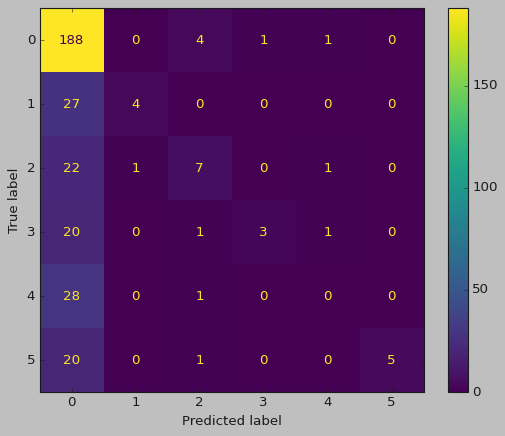

In [65]:
plt.style.use('classic')
cm = confusion_matrix(y_test, predictions1, labels=logReg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logReg.classes_)
disp.plot()

# **RANDOM FOREST**

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=0, class_weight={0:0.11 ,1: 0.12 ,2:0.67 ,3: 0.03, 4:0.05})  
rf.fit(X_train, y_train)

print("Training Accuracy :" , accuracy_score(y_train, rf.predict(X_train))*100 )

predictions2 = rf.predict(X_test)
#print(confusion_matrix(Y_test,predictions2))  
print(classification_report(y_test,predictions2))  
print("TEST ACCURACY  : ",accuracy_score(y_test, predictions2)*100)

Training Accuracy : 97.09605361131794
              precision    recall  f1-score   support

           0       0.63      0.92      0.75       194
           1       0.62      0.26      0.36        31
           2       0.73      0.35      0.48        31
           3       0.60      0.24      0.34        25
           4       0.22      0.07      0.11        29
           5       0.57      0.15      0.24        26

    accuracy                           0.62       336
   macro avg       0.56      0.33      0.38       336
weighted avg       0.60      0.62      0.56       336

TEST ACCURACY  :  62.202380952380956


# **HYPERPARAMETER FOR RANDOM FOREST FOR PURE TEXT**

In [67]:
rf_hy = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10)
rf_hy.fit(X_train, y_train)
print("Training Accuracy :" , accuracy_score(y_train, rf_hy.predict(X_train))*100 )

predictions2 = rf_hy.predict(X_test)
#print(confusion_matrix(Y_test,predictions2))  
print(classification_report(y_test,predictions2))  
print("TEST ACCURACY  : ",accuracy_score(y_test, predictions2)*100)

Training Accuracy : 97.39389426656739
              precision    recall  f1-score   support

           0       0.68      0.93      0.79       194
           1       0.53      0.32      0.40        31
           2       0.53      0.29      0.38        31
           3       0.76      0.52      0.62        25
           4       0.50      0.14      0.22        29
           5       0.64      0.27      0.38        26

    accuracy                           0.66       336
   macro avg       0.61      0.41      0.46       336
weighted avg       0.64      0.66      0.62       336

TEST ACCURACY  :  66.36904761904762


# **SVM**

In [68]:
from sklearn.svm import LinearSVC
sv = LinearSVC(class_weight={0:0.11 ,1: 0.12 ,2:0.67 ,3: 0.03, 4:0.05 })
sv.fit(X_train, y_train)

print("Training Accuracy :" , accuracy_score(y_train, sv.predict(X_train))*100 )

predictions3 = sv.predict(X_test)
#print(confusion_matrix(Y_test,predictions3))  
print(classification_report(y_test,predictions3,zero_division=1))  
print(" TEST ACCURACY : ",accuracy_score(y_test, predictions3)*100)

Training Accuracy : 95.60685033507073
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       194
           1       0.60      0.48      0.54        31
           2       0.56      0.58      0.57        31
           3       0.86      0.48      0.62        25
           4       0.33      0.10      0.16        29
           5       0.33      0.58      0.42        26

    accuracy                           0.67       336
   macro avg       0.57      0.51      0.52       336
weighted avg       0.67      0.67      0.65       336

 TEST ACCURACY :  66.66666666666666


# **SVM**   
random state =42

In [69]:
from sklearn.svm import LinearSVC
sv = LinearSVC(random_state=42)
sv.fit(X_train, y_train)

print("Training Accuracy :" , accuracy_score(y_train, sv.predict(X_train))*100 )

predictions3 = sv.predict(X_test)
#print(confusion_matrix(Y_test,predictions3))  
print(classification_report(y_test,predictions3,zero_division=1))  
print(" TEST ACCURACY : ",accuracy_score(y_test, predictions3)*100)

Training Accuracy : 98.80863737900223
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       194
           1       0.64      0.45      0.53        31
           2       0.60      0.48      0.54        31
           3       0.62      0.60      0.61        25
           4       0.16      0.10      0.12        29
           5       0.36      0.46      0.41        26

    accuracy                           0.65       336
   macro avg       0.52      0.49      0.50       336
weighted avg       0.64      0.65      0.64       336

 TEST ACCURACY :  65.47619047619048


SCALE  TRAINING  DATASETS 

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

# y_train_scaled =scaler.fit_transform(y_train.astype(np.float32))
# y_test_scaled =scaler.transform(y_test.astype(np.float32))


lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)
y_pred = lin_clf.predict(X_train_scaled)
print(accuracy_score(y_train, y_pred)*100)

99.6276991809382


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [71]:
from sklearn.svm import SVC
svm_clf = SVC(gamma='scale')
svm_clf.fit(X_train_scaled[:10000], y_train[:10000]) # We use an SVC with an RBF kernel
y_pred = svm_clf.predict(X_train_scaled)
print(accuracy_score(y_train, y_pred)*100)

80.78927773641102


https://medium.com/analytics-vidhya/hyperparameter-tuning-an-svm-a-demonstration-using-hyperparameter-tuning-cross-validation-on-96b05db54e5b

In [72]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
#Adding all values of hyperparameters in a list from which the values of hyperparameter will randomly inserted as hyperparameter

In [73]:
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])
rnd_search_cv.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ......C=6.90812364694858, gamma=0.08884058030184983; total time=   1.4s
[CV] END ......C=6.90812364694858, gamma=0.08884058030184983; total time=   1.5s
[CV] END ......C=6.90812364694858, gamma=0.08884058030184983; total time=   1.5s
[CV] END ....C=5.553981013974396, gamma=0.041113413538868264; total time=   1.2s
[CV] END ....C=5.553981013974396, gamma=0.041113413538868264; total time=   1.2s
[CV] END ....C=5.553981013974396, gamma=0.041113413538868264; total time=   1.1s
[CV] END .....C=4.043467541508055, gamma=0.03225528368323513; total time=   1.2s
[CV] END .....C=4.043467541508055, gamma=0.03225528368323513; total time=   1.2s
[CV] END .....C=4.043467541508055, gamma=0.03225528368323513; total time=   1.2s
[CV] END .....C=6.695558625799386, gamma=0.04779860819852397; total time=   1.2s
[CV] END .....C=6.695558625799386, gamma=0.04779860819852397; total time=   1.2s
[CV] END .....C=6.695558625799386, gamma=0.04779

SVC(C=5.998507460410227, gamma=0.002584623852891024)

In [74]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred)*100)

60.11904761904761


# **DECISION TREES**

In [75]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',splitter='best', class_weight={0:0.11 ,1: 0.12 ,2:0.67 ,3: 0.03, 4:0.05 },max_features='auto')
dt.fit(X_train, y_train)

print("Training Accuracy :" , accuracy_score(y_train, dt.predict(X_train))*100 )

predictions4 = dt.predict(X_test)
#print(confusion_matrix(Y_test,predictions4))  
print(classification_report(y_test,predictions4,zero_division=1))  
print("TEST ACCURACY SCORE : ",accuracy_score(y_test, predictions4)*100)

Training Accuracy : 99.6276991809382
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       194
           1       0.41      0.39      0.40        31
           2       0.53      0.32      0.40        31
           3       0.22      0.28      0.25        25
           4       0.04      0.03      0.04        29
           5       0.26      0.35      0.30        26

    accuracy                           0.52       336
   macro avg       0.36      0.35      0.35       336
weighted avg       0.53      0.52      0.52       336

TEST ACCURACY SCORE :  52.083333333333336


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


# **HYPER PARAMETER TUNNING FOR DECISION TREE FOR PURE TEXT**

Depth = 3

In [103]:
dt2 = DecisionTreeClassifier(max_depth =5 , random_state=42)
dt2.fit(X_train, y_train)
print("Training Accuracy :" , accuracy_score(y_train, dt2.predict(X_train))*100 )

predictions4 = dt2.predict(X_test)
#print(confusion_matrix(Y_test,predictions4))  
print(classification_report(y_test,predictions4,zero_division=1))  
print("TEST ACCURACY SCORE : ",accuracy_score(y_test, predictions4)*100)

Training Accuracy : 56.73864482501861
              precision    recall  f1-score   support

     Neutral       0.60      1.00      0.75       202
   Political       1.00      0.00      0.00        29
      Racist       1.00      0.00      0.00        27
    Religion       1.00      0.00      0.00        20
      Sexism       0.00      0.00      0.00        36
      sports       0.00      0.00      0.00        22

    accuracy                           0.60       336
   macro avg       0.60      0.17      0.13       336
weighted avg       0.59      0.60      0.45       336

TEST ACCURACY SCORE :  59.82142857142857


max_leaf_nodes =30

In [104]:
dt3 = DecisionTreeClassifier(max_leaf_nodes =30, random_state=42)
dt3.fit(X_train, y_train)
print("Training Accuracy :" , accuracy_score(y_train, dt3.predict(X_train))*100 )

predictions4 = dt3.predict(X_test)
#print(confusion_matrix(Y_test,predictions4))  
print(classification_report(y_test,predictions4,zero_division=1))  
print("TEST ACCURACY SCORE : ",accuracy_score(y_test, predictions4)*100)

Training Accuracy : 59.12137006701415
              precision    recall  f1-score   support

     Neutral       0.60      0.93      0.73       202
   Political       0.00      0.00      0.00        29
      Racist       0.00      0.00      0.00        27
    Religion       0.00      0.00      0.00        20
      Sexism       0.09      0.03      0.04        36
      sports       1.00      0.00      0.00        22

    accuracy                           0.56       336
   macro avg       0.28      0.16      0.13       336
weighted avg       0.44      0.56      0.45       336

TEST ACCURACY SCORE :  56.25


# **Ada Boost Classifier + Decision Tree**

In [78]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100 , base_estimator= dt)
abc.fit(X_train,y_train)

print("Training Accuracy :" , accuracy_score(y_train, abc.predict(X_train))*100)

predictions5 = abc.predict(X_test)
print(confusion_matrix(y_test,predictions5))
print(classification_report(y_test,predictions5))
print("TEST ACCURACY : ",accuracy_score(y_test, predictions5)*100)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training Accuracy : 99.6276991809382
[[189   0   0   1   4   0]
 [ 23   8   0   0   0   0]
 [ 22   1   8   0   0   0]
 [ 13   0   0  11   1   0]
 [ 25   0   0   0   4   0]
 [ 23   0   0   0   1   2]]
              precision    recall  f1-score   support

           0       0.64      0.97      0.77       194
           1       0.89      0.26      0.40        31
           2       1.00      0.26      0.41        31
           3       0.92      0.44      0.59        25
           4       0.40      0.14      0.21        29
           5       1.00      0.08      0.14        26

    accuracy                           0.66       336
   macro avg       0.81      0.36      0.42       336
weighted avg       0.72      0.66      0.59       336

TEST ACCURACY :  66.07142857142857


In [83]:
tweet.head(10)

,Text,Class,PureText,ConEmoji,Emojis
0,ඝරසරප චිත්‍රපටය පහළ තියෙන එකෙන් කරගන්න,Neutral,ඝරසරප චිත්‍රපටය පහළ තියෙන එකෙන් කරගන්න,,
1,මොකක් හරි නාට්‍යයක් තියෙන්නත් එපැයි,Neutral,මොකක් හරි නාට්‍යයක් තියෙන්නත් එපැයි ඉතින්,,
2,කිමද තරම් කොහේදෝ විදපු ගලක් උරන මා මිතුරු...,Neutral,කිමද මේ තරම් කොහේදෝ ඇති විදපු ගලක් හා උරන...,,
3,එහෙම කොහොමද උනේ 😂 පරය අපිව අයින් කරල නේ 😂,Neutral,එහෙම කොහොමද උනේ පරය අපිව අයින් කරල නේ,😂 😂,😂 😂
4,විමලයා ගොනෙක් වගෙ එකෙ මෑරෙන්න හදනවා පරය රටට ව...,Political,විමලයා ගොනෙක් වගෙ එකෙ මෑරෙන්න හදනවා පරය රටට ව...,,
5,ලැජ්ජයි ස⁣හෝදරයා විදිහ දැක්කාම ඔබලාගේ කුලල...,Racist,ලැජ්ජයි ස⁣හෝදරයා මේ යන විදිහ දැක්කාම ඔබලාග...,,
6,ලැජ්ජයි ස⁣හෝදරයා විදිහ දැක්කාම ඔබලාගේ කුලල්ක...,Racist,ලැජ්ජයි ස⁣හෝදරයා මේ යන විදිහ දැක්කාම ඔබලාගේ ...,,
7,මං තම්බි වගේද පෙන්නෙ 😏 මං බ්‍රහස්පතින්දා ...,Neutral,ඇයි මං තම්බි වගේද පෙන්නෙ මං බ්‍රහස්පතින්...,😏 😅,😏 😅
8,ඉටිම් බං උතුර ඉල්ලනසෙට් එකයි නැගෙනහිරපඉල්ලන...,Racist,ඉටිම් බං උතුර ඉල්ලනසෙට් එකයි නැගෙනහිරපඉල්ලන...,,
9,පේනවානේ තම්බි කවදත් ඉන්නේ උන්ට වාසි පැත්තේ...,Racist,පේනවානේ තම්බි කවදත් ඉන්නේ උන්ට වාසි පැත්තේ...,,


In [84]:
import demoji
demoji.download_codes()
def get_emoji_meaning(e):
    return demoji.replace_with_desc(e)
tweet['Con_emoji_meanings'] = tweet['ConEmoji'].apply(lambda x: ''.join(get_emoji_meaning(e) for e in x))

<ipython-input-84-116afbac4216>:2: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [85]:
tweet.head(10)

,Text,Class,PureText,ConEmoji,Emojis,Con_emoji_meanings
0,ඝරසරප චිත්‍රපටය පහළ තියෙන එකෙන් කරගන්න,Neutral,ඝරසරප චිත්‍රපටය පහළ තියෙන එකෙන් කරගන්න,,,
1,මොකක් හරි නාට්‍යයක් තියෙන්නත් එපැයි,Neutral,මොකක් හරි නාට්‍යයක් තියෙන්නත් එපැයි ඉතින්,,,
2,කිමද තරම් කොහේදෝ විදපු ගලක් උරන මා මිතුරු...,Neutral,කිමද මේ තරම් කොහේදෝ ඇති විදපු ගලක් හා උරන...,,,
3,එහෙම කොහොමද උනේ 😂 පරය අපිව අයින් කරල නේ 😂,Neutral,එහෙම කොහොමද උනේ පරය අපිව අයින් කරල නේ,😂 😂,😂 😂,:face with tears of joy: :face with tears of joy:
4,විමලයා ගොනෙක් වගෙ එකෙ මෑරෙන්න හදනවා පරය රටට ව...,Political,විමලයා ගොනෙක් වගෙ එකෙ මෑරෙන්න හදනවා පරය රටට ව...,,,
5,ලැජ්ජයි ස⁣හෝදරයා විදිහ දැක්කාම ඔබලාගේ කුලල...,Racist,ලැජ්ජයි ස⁣හෝදරයා මේ යන විදිහ දැක්කාම ඔබලාග...,,,
6,ලැජ්ජයි ස⁣හෝදරයා විදිහ දැක්කාම ඔබලාගේ කුලල්ක...,Racist,ලැජ්ජයි ස⁣හෝදරයා මේ යන විදිහ දැක්කාම ඔබලාගේ ...,,,
7,මං තම්බි වගේද පෙන්නෙ 😏 මං බ්‍රහස්පතින්දා ...,Neutral,ඇයි මං තම්බි වගේද පෙන්නෙ මං බ්‍රහස්පතින්...,😏 😅,😏 😅,:smirking face: :grinning face with sweat:
8,ඉටිම් බං උතුර ඉල්ලනසෙට් එකයි නැගෙනහිරපඉල්ලන...,Racist,ඉටිම් බං උතුර ඉල්ලනසෙට් එකයි නැගෙනහිරපඉල්ලන...,,,
9,පේනවානේ තම්බි කවදත් ඉන්නේ උන්ට වාසි පැත්තේ...,Racist,පේනවානේ තම්බි කවදත් ඉන්නේ උන්ට වාසි පැත්තේ...,,,


# **SENTIMENT ANALYSIS FOR CONCERNED EMOJIS MEANINGS**

In [86]:
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [87]:
def data_processing(text):
    text = text.lower()# changning into lower case 
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE) #removing the url 
    text = re.sub(r'\@w+|\#','',text) #removing hashtags and the punctuations 
    text = re.sub(r'[^\w\s]','',text) #
    text_tokens = word_tokenize(text) # removing stopwords
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [88]:
tweet['Con_emoji_meanings'] =  tweet['Con_emoji_meanings'].apply(data_processing)

In [89]:
import nltk
nltk.download('omw')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package omw to /root/nltk_data...


In [90]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [91]:
tweet['Con_emoji_meanings'] =  tweet['Con_emoji_meanings'].apply(lambda x: stemming(x))

In [92]:
tweet.head(10)

,Text,Class,PureText,ConEmoji,Emojis,Con_emoji_meanings
0,ඝරසරප චිත්‍රපටය පහළ තියෙන එකෙන් කරගන්න,Neutral,ඝරසරප චිත්‍රපටය පහළ තියෙන එකෙන් කරගන්න,,,
1,මොකක් හරි නාට්‍යයක් තියෙන්නත් එපැයි,Neutral,මොකක් හරි නාට්‍යයක් තියෙන්නත් එපැයි ඉතින්,,,
2,කිමද තරම් කොහේදෝ විදපු ගලක් උරන මා මිතුරු...,Neutral,කිමද මේ තරම් කොහේදෝ ඇති විදපු ගලක් හා උරන...,,,
3,එහෙම කොහොමද උනේ 😂 පරය අපිව අයින් කරල නේ 😂,Neutral,එහෙම කොහොමද උනේ පරය අපිව අයින් කරල නේ,😂 😂,😂 😂,face tears joy face tears joy
4,විමලයා ගොනෙක් වගෙ එකෙ මෑරෙන්න හදනවා පරය රටට ව...,Political,විමලයා ගොනෙක් වගෙ එකෙ මෑරෙන්න හදනවා පරය රටට ව...,,,
5,ලැජ්ජයි ස⁣හෝදරයා විදිහ දැක්කාම ඔබලාගේ කුලල...,Racist,ලැජ්ජයි ස⁣හෝදරයා මේ යන විදිහ දැක්කාම ඔබලාග...,,,
6,ලැජ්ජයි ස⁣හෝදරයා විදිහ දැක්කාම ඔබලාගේ කුලල්ක...,Racist,ලැජ්ජයි ස⁣හෝදරයා මේ යන විදිහ දැක්කාම ඔබලාගේ ...,,,
7,මං තම්බි වගේද පෙන්නෙ 😏 මං බ්‍රහස්පතින්දා ...,Neutral,ඇයි මං තම්බි වගේද පෙන්නෙ මං බ්‍රහස්පතින්...,😏 😅,😏 😅,smirking face grinning face sweat
8,ඉටිම් බං උතුර ඉල්ලනසෙට් එකයි නැගෙනහිරපඉල්ලන...,Racist,ඉටිම් බං උතුර ඉල්ලනසෙට් එකයි නැගෙනහිරපඉල්ලන...,,,
9,පේනවානේ තම්බි කවදත් ඉන්නේ උන්ට වාසි පැත්තේ...,Racist,පේනවානේ තම්බි කවදත් ඉන්නේ උන්ට වාසි පැත්තේ...,,,


In [93]:
# tweet.to_csv('cleaned.csv')